# Problem Part 1

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
 

The company wants to know:

* Which variables are significant in predicting the price of a house, and

* How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

### Business Goal

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import os
import warnings
warnings.filterwarnings('ignore')

## Data Understanding

In [77]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**There are 81 Variables in the data**

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [79]:
round((data.isnull().sum()/len(data))*100,2).sort_values(ascending= False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
                 ...  
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
3SsnPorch         0.00
BsmtUnfSF         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
Functional 

**Drop variables PoolQC ,MiscFeature, Alley, Fence, FireplaceQu as they have very high missing values**

In [80]:
data = data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

In [81]:
data_null = pd.DataFrame(round((data.isnull().sum()/len(data))*100,2).sort_values(ascending= False),columns=['Null%'])

data_null.index.name = 'Variable'

data_null.head()

,Null%
Variable,
LotFrontage,17.74
GarageFinish,5.55
GarageType,5.55
GarageCond,5.55
GarageQual,5.55


In [82]:
act_null = data_null[data_null['Null%'] > 0]

In [83]:
act_null

,Null%
Variable,
LotFrontage,17.74
GarageFinish,5.55
GarageType,5.55
GarageCond,5.55
GarageQual,5.55
GarageYrBlt,5.55
BsmtExposure,2.60
BsmtFinType2,2.60
BsmtFinType1,2.53


In [84]:
#Check Null value columns 1 by 1 

print('\n')
print('LotFrontage: ',data['LotFrontage'].value_counts())
print('\n')
print('GarageCond: ',data['GarageCond'].value_counts())
print('\n')
print('GarageType: ',data['GarageType'].value_counts())
print('\n')
print('GarageYrBlt: ',data['GarageYrBlt'].value_counts())
print('\n')
print('GarageFinish: ',data['GarageFinish'].value_counts())
print('\n')
print('GarageQual: ',data['GarageQual'].value_counts())
print('\n')
print('BsmtExposure: ',data['BsmtExposure'].value_counts())
print('\n')
print('BsmtFinType2: ',data['BsmtFinType2'].value_counts())
print('\n')
print('BsmtFinType1: ',data['BsmtFinType1'].value_counts())
print('\n')
print('BsmtCond: ',data['BsmtCond'].value_counts())
print('\n')
print('BsmtQual: ',data['BsmtQual'].value_counts())
print('\n')
print('MasVnrArea: ',data['MasVnrArea'].value_counts())
print('\n')
print('MasVnrType: ',data['MasVnrType'].value_counts())
print('\n')
print('Electrical: ',data['Electrical'].value_counts())





LotFrontage:  60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
        ... 
129.0      2
124.0      2
118.0      2
101.0      2
122.0      2
121.0      2
115.0      2
109.0      2
116.0      2
114.0      2
150.0      1
111.0      1
153.0      1
182.0      1
46.0       1
112.0      1
149.0      1
141.0      1
33.0       1
152.0      1
160.0      1
168.0      1
128.0      1
144.0      1
39.0       1
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64


GarageCond:  TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


GarageType:  Attchd     870
Detchd     387


**Variable LotFrontage & GarageYrBlt can be imputed using median instead of mean as there are outliers in the data**

**Other variables such as *['GarageCond', 'GarageType', 'GarageFinish','GarageQual','BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea', 'MasVnrType', 'Electrical']* can be imputed using mode as they have categorical data**

In [85]:
##Creating numeric and categorical variables list which are to be imputed as they have missing values
num_list = ['LotFrontage','GarageYrBlt']
cat_list = ['GarageCond', 'GarageType', 'GarageFinish','GarageQual','BsmtExposure', 'BsmtFinType2',
            'BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea', 'MasVnrType', 'Electrical']

for col in num_list:
    data[col] = data[col].fillna(data[col].median())

for col in cat_list:
    data[col] = data[col].fillna(data[col].mode()[0])

In [86]:
#Re-checking for null-values
round((data.isnull().sum()/len(data))*100,2).sort_values(ascending= False)

SalePrice        0.0
ExterCond        0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
SaleCondition    0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
                ... 
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
GarageFinish     0.0
GarageType       0.0
HeatingQC        0.0
Fireplaces       0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF     

**No Null Values now**

In [87]:
#ID column can also be dropped as it is just distinct ID and adds no value for modelling
data = data.drop('Id',axis=1)
data.shape

(1460, 75)

**Now data is clean with 75 columns and 1460 rows**

## EDA 
### Treating Outliers

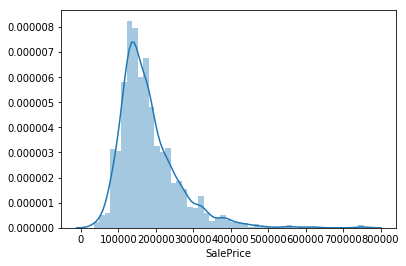

In [95]:
plt.figure()
sns.distplot(data['SalePrice'])

Data Has some outliers in the upper side, we can treat all the outliers in the numeric columns together

In [98]:
#Finding Numeric columns
num_col = data.select_dtypes(exclude='object').columns.tolist()
num_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [99]:
for cols in num_col:
    Q1 = data[cols].quantile(0.05)
    Q3 = data[cols].quantile(0.95)
    IQR = Q3 - Q1

    data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR)))]

    


In [100]:
data.shape

(1265, 75)

In [101]:
#Now roking on a cleaner dataset with all outliers removed
data_clean = data

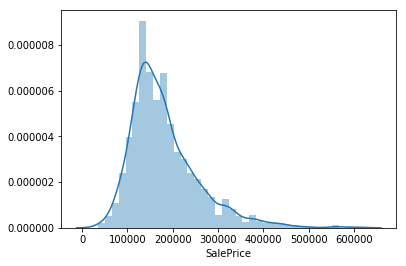

In [102]:
#Checking if outliers have been removed or not
sns.distplot(data['SalePrice'])


Outliers have been removed

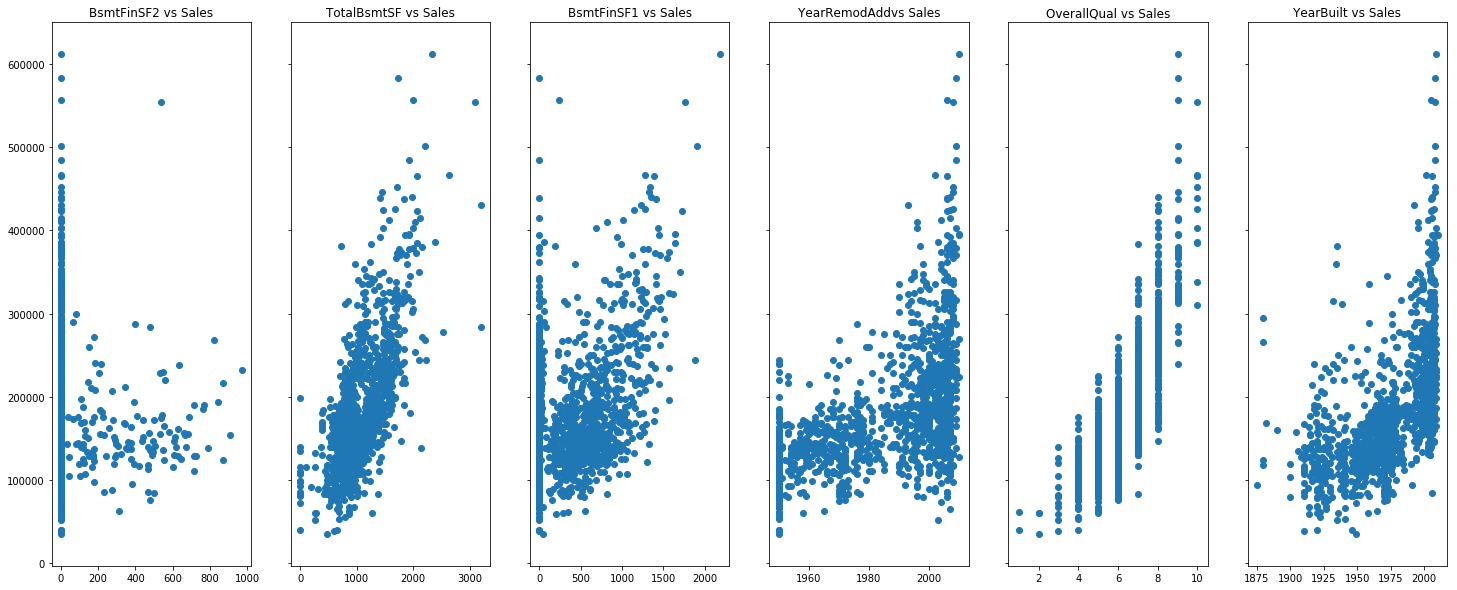

In [118]:
# Plotting for numeric variables to check relationship with salesprice
fig, ax = plt.subplots(ncols=6, sharey=True)

BsmtFinSF2 = ax[0].scatter(data_clean['BsmtFinSF2'], data_clean['SalePrice'])
ax[0].set_title('BsmtFinSF2 vs Sales')

TotalBsmtSF = ax[1].scatter(data_clean['TotalBsmtSF'], data_clean['SalePrice'])
ax[1].set_title('TotalBsmtSF vs Sales')

BsmtFinSF1 = ax[2].scatter(data_clean['BsmtFinSF1'], data_clean['SalePrice'])
ax[2].set_title('BsmtFinSF1 vs Sales')

YearRemodAdd = ax[3].scatter(data_clean['YearRemodAdd'], data_clean['SalePrice'])
ax[3].set_title('YearRemodAddvs Sales')

OverallQual = ax[4].scatter(data_clean['OverallQual'], data_clean['SalePrice'])
ax[4].set_title('OverallQual vs Sales')

YearBuilt = ax[5].scatter(data_clean['YearBuilt'], data_clean['SalePrice'])
ax[5].set_title('YearBuilt vs Sales')


fig.set_size_inches(25, 10, forward=True)

plt.show()


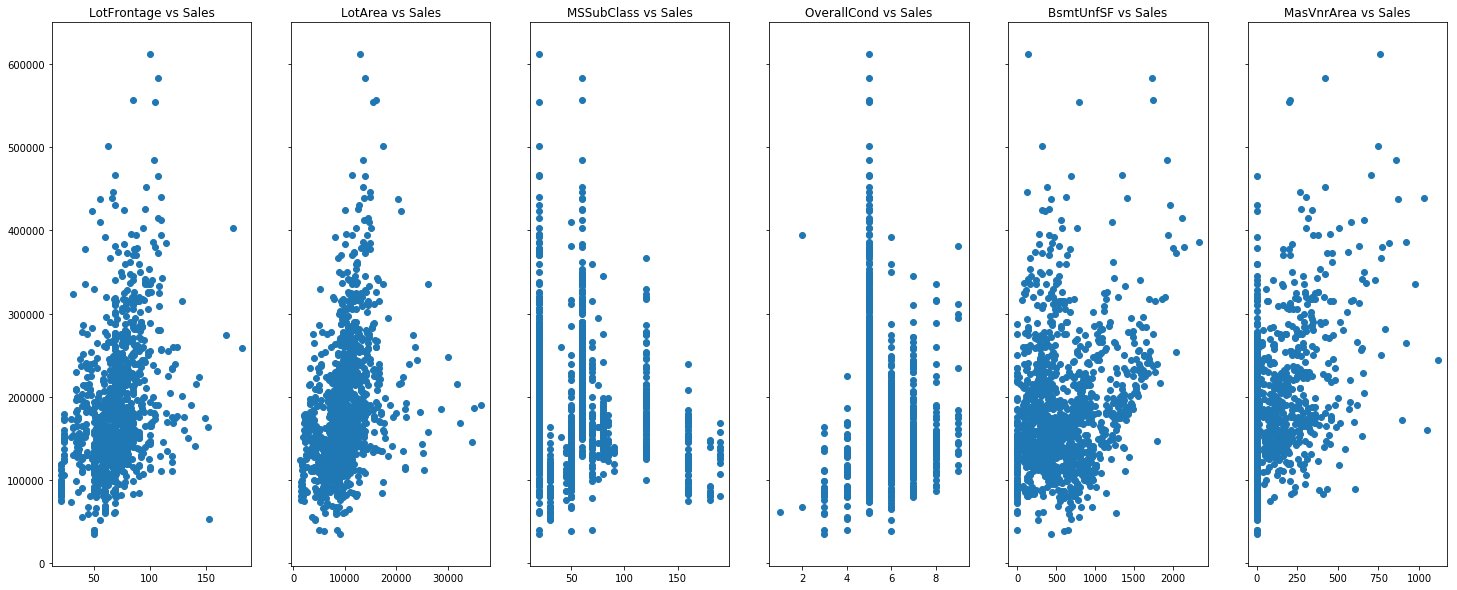

In [119]:
# Plotting for numeric variables to check relationship with salesprice
fig, ax = plt.subplots(ncols=6, sharey=True)


LotFrontage= ax[0].scatter(data_clean['LotFrontage'], data_clean['SalePrice'])
ax[0].set_title('LotFrontage vs Sales')

LotArea = ax[1].scatter(data_clean['LotArea'], data_clean['SalePrice'])
ax[1].set_title('LotArea vs Sales')

MSSubClass = ax[2].scatter(data_clean['MSSubClass'], data_clean['SalePrice'])
ax[2].set_title('MSSubClass vs Sales')


OverallCond = ax[3].scatter(data_clean['OverallCond'], data_clean['SalePrice'])
ax[3].set_title('OverallCond vs Sales')


BsmtUnfSF = ax[4].scatter(data_clean['BsmtUnfSF'], data_clean['SalePrice'])
ax[4].set_title('BsmtUnfSF vs Sales')


MasVnrArea= ax[5].scatter(data_clean['MasVnrArea'], data_clean['SalePrice'])
ax[5].set_title('MasVnrArea vs Sales')


fig.set_size_inches(25, 10, forward=True)

plt.show()

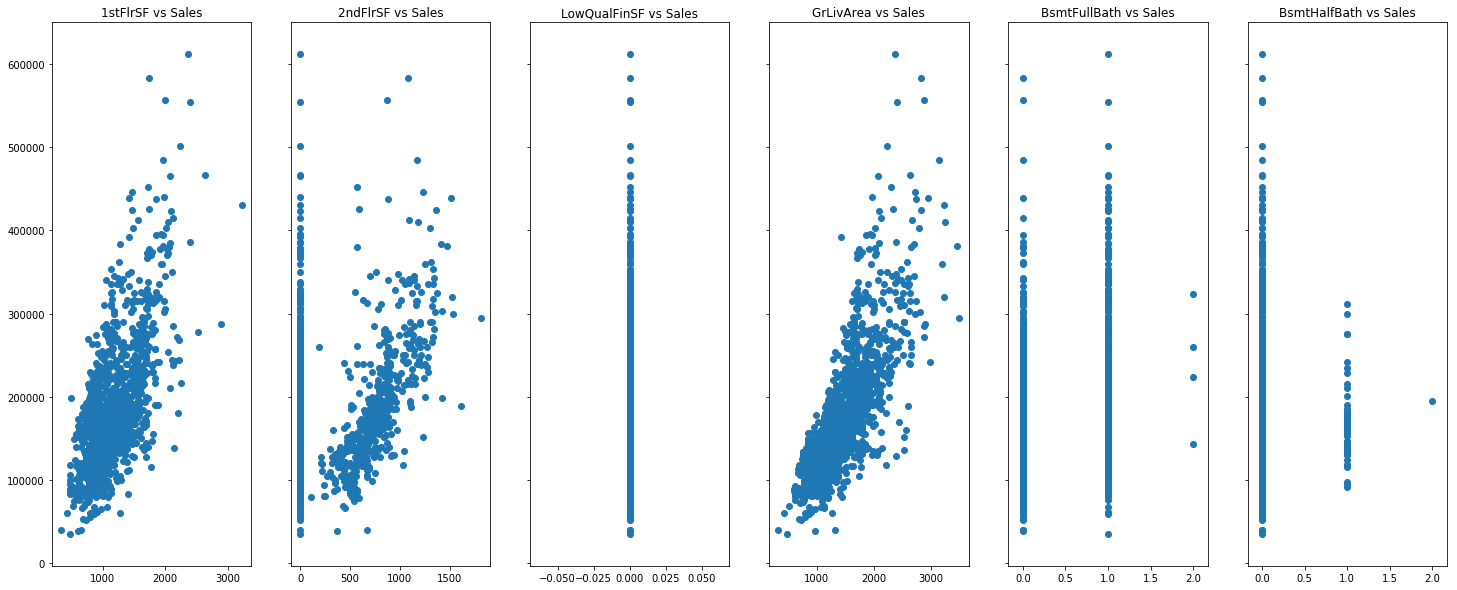

In [124]:
fig, ax = plt.subplots(ncols=6, sharey=True)

stFlrSF = ax[0].scatter(data_clean['1stFlrSF'], data_clean['SalePrice'])
ax[0].set_title('1stFlrSF vs Sales')

ndata_cleanlrSF= ax[1].scatter(data_clean['2ndFlrSF'], data_clean['SalePrice'])
ax[1].set_title('2ndFlrSF vs Sales')

LowQualFinSF = ax[2].scatter(data_clean['LowQualFinSF'], data_clean['SalePrice'])
ax[2].set_title('LowQualFinSF vs Sales')

GrLivArea = ax[3].scatter(data_clean['GrLivArea'], data_clean['SalePrice'])
ax[3].set_title('GrLivArea vs Sales')

BsmtFullBath = ax[4].scatter(data_clean['BsmtFullBath'], data_clean['SalePrice'])
ax[4].set_title('BsmtFullBath vs Sales')

BsmtHalfBath = ax[5].scatter(data_clean['BsmtHalfBath'], data_clean['SalePrice'])
ax[5].set_title('BsmtHalfBath vs Sales')


fig.set_size_inches(25, 10, forward=True)

plt.show()


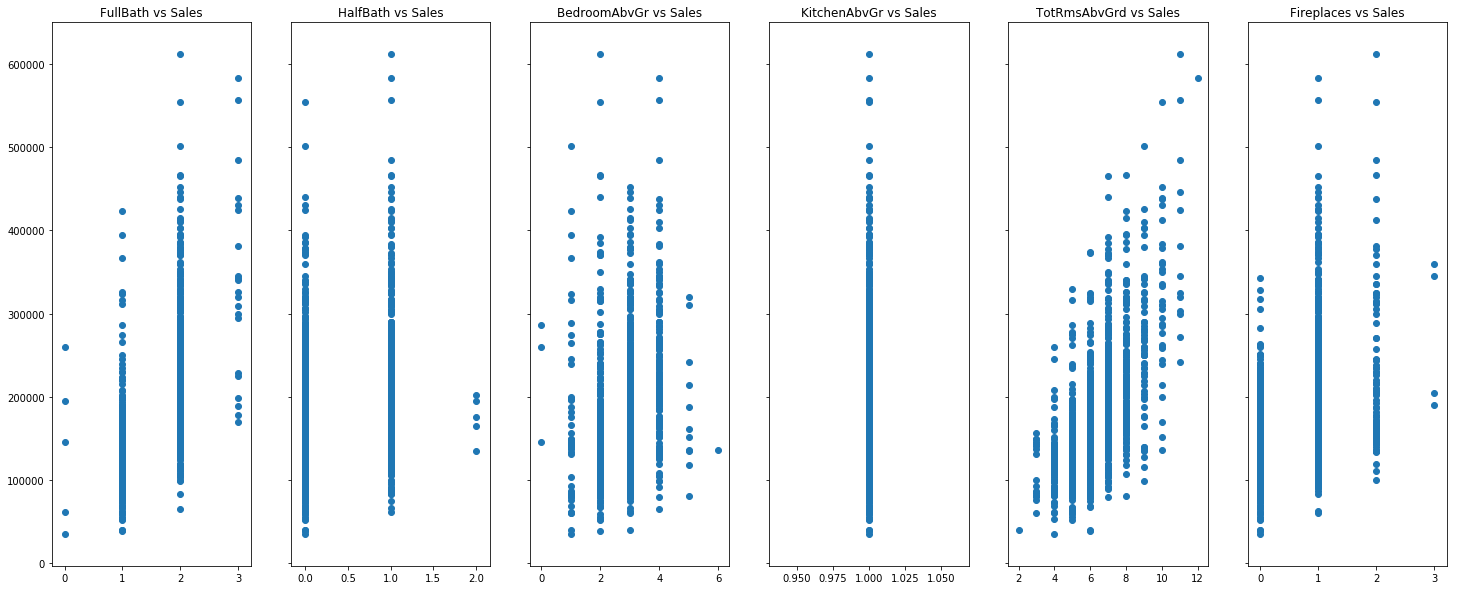

In [125]:
fig, ax = plt.subplots(ncols=6, sharey=True)

FullBath = ax[0].scatter(data_clean['FullBath'], data_clean['SalePrice'])
ax[0].set_title('FullBath vs Sales')

HalfBath= ax[1].scatter(data_clean['HalfBath'], data_clean['SalePrice'])
ax[1].set_title('HalfBath vs Sales')

BedroomAbvGr = ax[2].scatter(data_clean['BedroomAbvGr'], data_clean['SalePrice'])
ax[2].set_title('BedroomAbvGr vs Sales')

KitchenAbvGr = ax[3].scatter(data_clean['KitchenAbvGr'], data_clean['SalePrice'])
ax[3].set_title('KitchenAbvGr vs Sales')

TotRmsAbvGrd = ax[4].scatter(data_clean['TotRmsAbvGrd'], data_clean['SalePrice'])
ax[4].set_title('TotRmsAbvGrd vs Sales')

Fireplaces = ax[5].scatter(data_clean['Fireplaces'], data_clean['SalePrice'])
ax[5].set_title('Fireplaces vs Sales')


fig.set_size_inches(25, 10, forward=True)

plt.show()

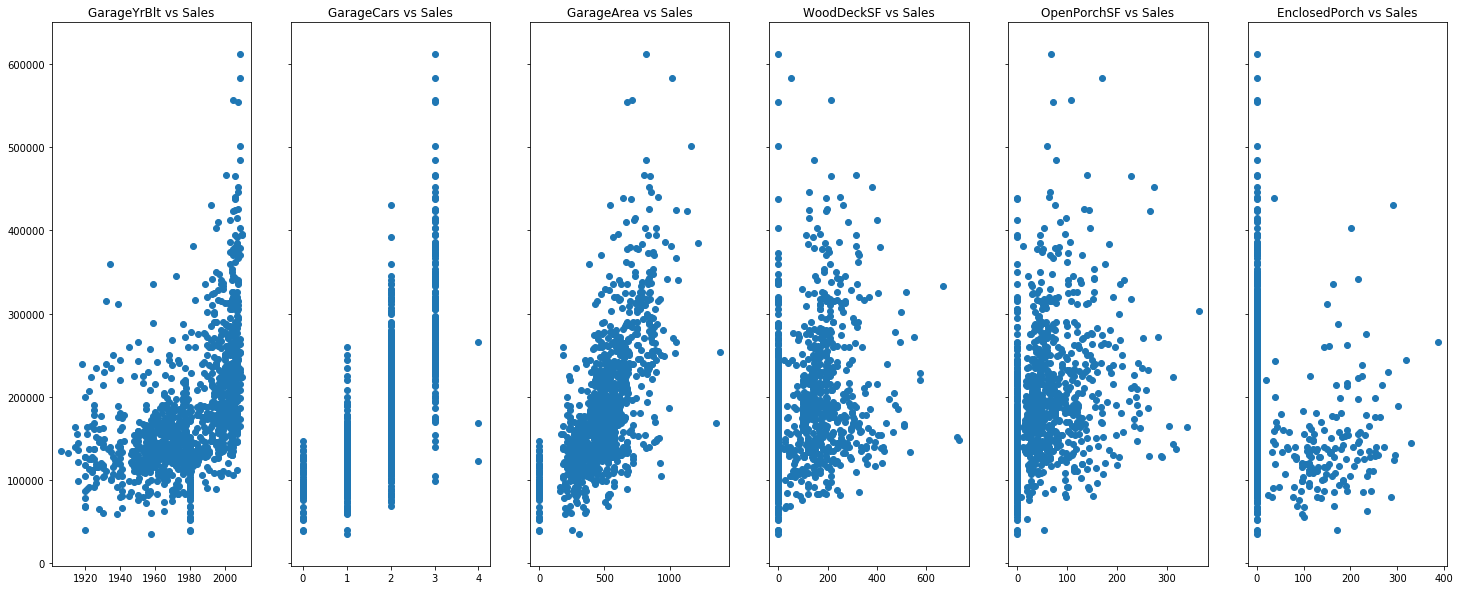

In [126]:
fig, ax = plt.subplots(ncols=6, sharey=True)

GarageYrBlt = ax[0].scatter(data_clean['GarageYrBlt'], data_clean['SalePrice'])
ax[0].set_title('GarageYrBlt vs Sales')

GarageCars= ax[1].scatter(data_clean['GarageCars'], data_clean['SalePrice'])
ax[1].set_title('GarageCars vs Sales')

GarageArea = ax[2].scatter(data_clean['GarageArea'], data_clean['SalePrice'])
ax[2].set_title('GarageArea vs Sales')

WoodDeckSF = ax[3].scatter(data_clean['WoodDeckSF'], data_clean['SalePrice'])
ax[3].set_title('WoodDeckSF vs Sales')

OpenPorchSF = ax[4].scatter(data_clean['OpenPorchSF'], data_clean['SalePrice'])
ax[4].set_title('OpenPorchSF vs Sales')

EnclosedPorch = ax[5].scatter(data_clean['EnclosedPorch'], data_clean['SalePrice'])
ax[5].set_title('EnclosedPorch vs Sales')


fig.set_size_inches(25, 10, forward=True)

plt.show()

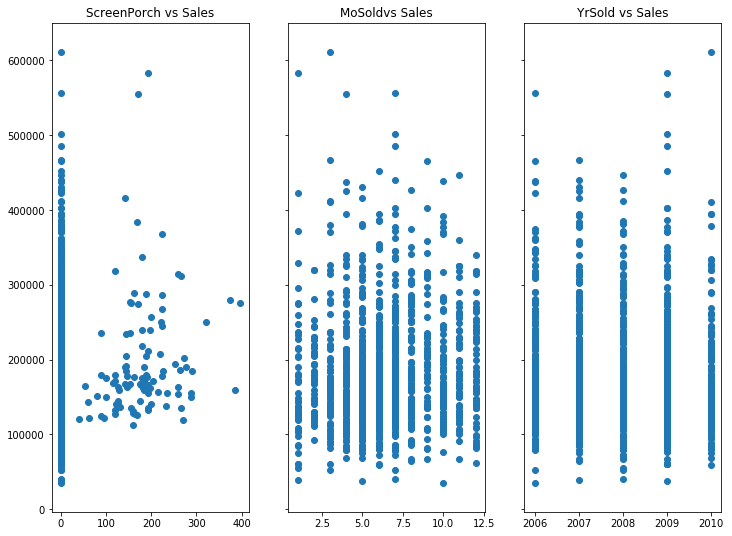

In [131]:
fig, ax = plt.subplots(ncols=3, sharey=True)


ScreenPorch= ax[0].scatter(data_clean['ScreenPorch'], data_clean['SalePrice'])
ax[0].set_title('ScreenPorch vs Sales')

MoSold = ax[1].scatter(data_clean['MoSold'], data_clean['SalePrice'])
ax[1].set_title('MoSoldvs Sales')

YrSold = ax[2].scatter(data_clean['YrSold'], data_clean['SalePrice'])
ax[2].set_title('YrSold vs Sales')


fig.set_size_inches(12, 9, forward=True)

plt.show()

Some Features like - GarageYrBlt, GarageArea, OpenPorchSF,1stFlrSF, 2ndFlrSF, GrLivArea, LotFrontage, LotArea, BsmtUnfSF, MasVnrArea,TotalBsmtSF, BsmtFinSF1, YearRemodAddvs ,YearBuilt shows some linear relationship with SalePrice

**Correlation matrix with highly collinearity with salesprice**

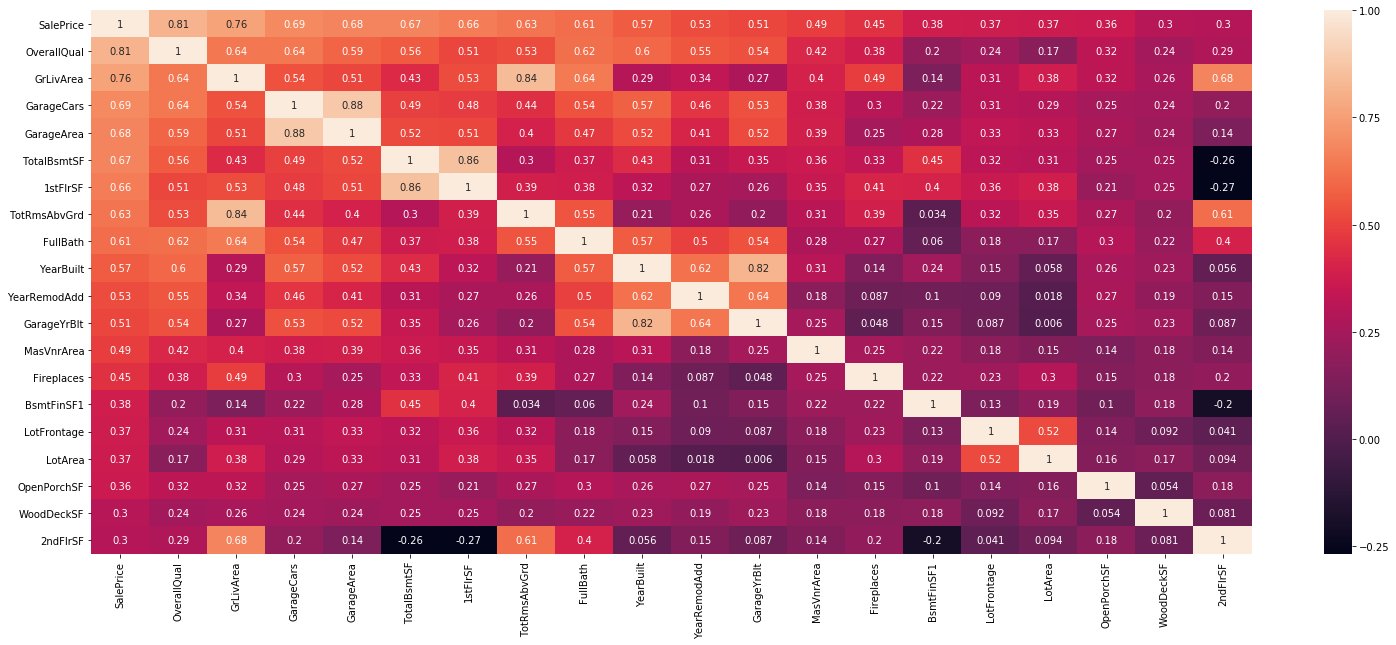

In [133]:
plt.figure(figsize = (26, 10))
n = 20 # number of variables which have the highest correlation with 'Sales price'

highcorr = data_clean.corr()

cols = highcorr.nlargest(n, 'SalePrice')['SalePrice'].index
sns.heatmap(data_clean[cols].corr(),annot=True)
plt.show()

### Some Observations
    . Variables OverallQual, GLivArea, GarageCars, GarageArea, TotalBsmntSF, 1stFlrSF, TotRmsAbvGrd, FullBatth, YearBuilt, YearRemoveAdd have high correlation with SalesPRice
    . Variable GarageArea & GarageCars , GarageYrBlt & YearBuilt, GrLivArea & TotRmsAbvGrd have high correlation so one of them can be removed to above multicollinearity but we will leave that to RFE to detect & remove later

### Create dummy variables for categorical variables

In [135]:
#Check how many coolumns are there currently & number of categorical variables
print(data_clean.shape)
print(len(data_clean.select_dtypes(include='object').columns.tolist()))

(1265, 75)
38


We have 75 Columns and 38 categorical variables

In [137]:
data_final=pd.get_dummies(data_clean,drop_first=True)
data_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


We have now 233 columns created due to dummy values

## Build Model
* **Create train test split**

In [139]:
#Dividing target and dependent variables
y = data_final.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [141]:
X = data_final
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state = 100)

In [147]:
print("X_train Shape is:", X_train.shape)
print("X_test Shape is:",X_test.shape)
print("y_train Shape is:", y_train.shape)
print("y_test Shape is:",y_test.shape)

X_train Shape is: (885, 222)
X_test Shape is: (380, 222)
y_train Shape is: (885,)
y_test Shape is: (380,)


 * **Scaling Numeric Variables**

In [153]:
#Scaling using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

#Finding numerical variables in X 

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885 entries, 1135 to 927
Columns: 222 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(186)
memory usage: 416.6 KB


In [154]:
X_numvar = X_train.select_dtypes(include=['int64','int32','float64','float32','uint8']).columns.tolist()
X_numvar

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhoo

In [155]:
X_train[X_numvar].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1135,30,60.0,6180,6,5,1926,1950,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
976,30,51.0,5900,4,7,1923,1958,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1380,30,45.0,8212,3,3,1914,1950,0.0,203,0,...,0,0,0,0,1,0,0,0,1,0
1054,60,90.0,11367,8,5,2002,2002,210.0,932,0,...,0,0,0,0,1,0,0,0,1,0
178,20,63.0,17423,9,5,2008,2009,748.0,1904,0,...,0,0,1,0,0,0,0,0,0,1


In [157]:
#Fitting and transforming train data whereas just transforming the test data on the same fit as train, this is done to avoid biasness in the test data
X_train[X_numvar] = scaler.fit_transform(X_train[X_numvar])
X_test[X_numvar] = scaler.transform(X_test[X_numvar])

In [158]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1135,0.058824,0.254902,0.138636,0.555556,0.50,0.353846,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
976,0.058824,0.196078,0.130682,0.333333,0.75,0.330769,0.133333,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1380,0.058824,0.156863,0.196364,0.222222,0.25,0.261538,0.000000,0.000000,0.092779,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1054,0.235294,0.450980,0.285994,0.777778,0.50,0.938462,0.866667,0.188341,0.425960,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
178,0.000000,0.274510,0.458040,0.888889,0.50,0.984615,0.983333,0.670852,0.870201,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Variables have been transformed now

* **Feature selection using RFE, then fit and predict train and test**

In [159]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()       
rfe = RFE(lm, 20)             #selecting 20 best features
rfe = rfe.fit(X_train, y_train)

In [160]:
#Find the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 78),
 ('LotFrontage', False, 138),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 126),
 ('MasVnrArea', False, 64),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 20),
 ('BsmtUnfSF', False, 19),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 30),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 149),
 ('BsmtHalfBath', False, 180),
 ('FullBath', False, 137),
 ('HalfBath', False, 189),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 32),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 151),
 ('GarageYrBlt', False, 155),
 ('GarageCars', False, 63),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 118),
 ('OpenPorchSF', False, 112),
 ('EnclosedPorch', False, 119),
 ('3SsnPorch', False, 38),
 ('ScreenPorch', False, 56),
 ('PoolArea', False, 33),
 ('MiscVal', False, 39),
 ('MoSold', False, 95),
 ('YrSold', False, 183),
 ('MSZon

In [164]:
#Extracting top features from the train dataset
top = X_train.columns[rfe.support_]
top

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'GarageArea', 'Street_Pave', 'Foundation_Slab',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Mod',
       'Functional_Sev', 'SaleCondition_Alloca'],
      dtype='object')

In [167]:
#Creating new train and test dataset with limited top features

X_train1=X_train[top]
X_test1=X_test[top]

In [168]:
#Fit the model on top features
lm1 = lm.fit(X_train1,y_train)
#Print intercept and coefficient
print(lm1.intercept_)
print(lm1.coef_)

-60124.32010839949
[ 52268.8702584  101301.44133313  48003.62892442  51869.95159714
  42165.87037852 134459.99486242  44541.22122332  58803.30341116
  74645.9955118  -68939.91353966  62330.8841081   46508.279476
  39372.62976937  51404.30310344 -42671.05849886 -47458.20296536
 -53649.90277069 -39658.46014721 -94670.79931309 -38554.64565411]


In [169]:
#Predicting train and test dataset
y_pred_train = lm1.predict(X_train1)
y_pred_test = lm1.predict(X_test1)

* **Evaluation of the mdoel**

In [206]:
from sklearn.metrics import r2_score, mean_squared_error
#Adjusted R2 Score for train and test

n_train = len(y_train) #total number of samples for train
n_test = len(y_test)   #total number of samples for test
r2_train = r2_score(y_train,y_pred_train)
k = X_train1.shape[1] #Number of features 
adj_r2 = 1 - ((1-r2_train)*(n_train-1)/(n_train-k-1))
print("Adj R2 Score for train data is:", adj_r2)

r2_test = r2_score(y_test,y_pred_test)
adj_r2_test = 1 - ((1-r2_test)*(n_test-1)/(n_test-k-1))
print("Adj R2 Score for test data is:", adj_r2_test)

Adj R2 Score for train data is: 0.88914607679865
Adj R2 Score for test data is: 0.8601560122689227


Adjusted R2 Values of test and train are pretty close so no problem of overfitting

In [195]:
#Calculating ssr , mse and rmse

ssr_train = np.sum(np.square(y_train-y_pred_train))
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mse_train**0.5
print("Sum of squared error train:",ssr_train)
print("Sum of Mean squared error train:",mse_train)
print("Sum of Root Mean squared error train:",rmse_train)

ssr_test = np.sum(np.square(y_test-y_pred_test))
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test**0.5

print("Sum of squared error test:",ssr_test)
print("Sum of Mean squared error test:",mse_test)
print("Sum of Root Mean squared error test:",rmse_test)


Sum of squared error train: 591410907730.9144
Sum of Mean squared error train: 668260912.6902988
Sum of Root Mean squared error train: 25850.742981398016
Sum of squared error test: 238922724322.22073
Sum of Mean squared error test: 628744011.3742651
Sum of Root Mean squared error test: 25074.768421149278


## Ridge and Lasso Regression
*  **Ridge Regression**

In [179]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [186]:
# list of lambdas to tune

var = [0,.001,0.01,0.1,1,10,100,1000] #Values to be considered for lamdas
params = {'alpha':var}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train1, y_train)

    

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [187]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 1}
-18383.267425140435


Best value for lamda is 1 in case of ridge

In [188]:
alpha = 1
ridgereg = Ridge(alpha=alpha)
ridgereg.fit(X_train1, y_train)
ridgereg.coef_

array([ 46463.5035333 , 100181.44333774,  41923.17817186,  52312.64831655,
        44476.25460587, 106745.14939761,  54381.63477549,  50755.1264527 ,
        79029.20890513, -54919.9817958 ,  58714.82330097,  48485.3258808 ,
        18339.18262514,  36352.56431864, -41696.74535869, -47519.83546986,
       -55290.73203236, -31984.41513904, -46501.53213067, -18752.4130883 ])

In [191]:
#Predicting test datasets

y_pred_train_r = ridgereg.predict(X_train1)
y_pred_test_r = ridgereg.predict(X_test1)

**Evaluating Ridge Regression**

In [205]:
#Adjusted R2 Scores
r2_train_r = r2_score(y_train,y_pred_train_r)
 
adj_r2_r = 1 - ((1-r2_train_r)*(n_train-1)/(n_train-k-1))
print("Adj R2 Score for train data is using Ridge Reg:", adj_r2_r)

r2_test_r = r2_score(y_test,y_pred_test_r)
adj_r2_test_r = 1 - ((1-r2_test_r)*(n_test-1)/(n_test-k-1))
print("Adj R2 Score for test data is using Ridge Reg:", adj_r2_test_r)

Adj R2 Score for train data is using Ridge Reg: 0.8877179065591213
Adj R2 Score for test data is using Ridge Reg: 0.8666735446964924


In [194]:
#Calculating ssr , mse and rmse

ssr_train_r = np.sum(np.square(y_train-y_pred_train_r))
mse_train_r = mean_squared_error(y_train, y_pred_train_r)
rmse_train_r = mse_train**0.5
print("Sum of squared error train:",ssr_train_r)
print("Sum of Mean squared error train:",mse_train_r)
print("Sum of Root Mean squared error train:",rmse_train_r)

ssr_test_r = np.sum(np.square(y_test-y_pred_test_r))
mse_test_r = mean_squared_error(y_test, y_pred_test_r)
rmse_test_r = mse_test**0.5

print("Sum of squared error test:",ssr_test_r)
print("Sum of Mean squared error test:",mse_test_r)
print("Sum of Root Mean squared error test:",rmse_test_r)

Sum of squared error train: 599030263305.9067
Sum of Mean squared error train: 676870354.0179737
Sum of Root Mean squared error train: 26016.732193301556
Sum of squared error test: 227787554132.0808
Sum of Mean squared error test: 599440931.9265285
Sum of Root Mean squared error test: 24483.482838977965


* **Lasso Regression**

In [199]:
lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train1, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [200]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 10}
-18588.90360952686


**Best Lambda in Lasso is 10**

In [201]:
alpha = 10
lassoreg = Lasso(alpha=alpha)
lassoreg.fit(X_train1, y_train)
lassoreg.coef_

array([ 50883.53932198, 102141.84452502,  47006.90975623,  51786.5656094 ,
        42341.1446595 , 131330.26809518,      0.        ,  28908.41681043,
       125398.2518924 , -66691.27608301,  61447.58297108,  46200.8258437 ,
        29563.56846075,  48983.45322056, -42053.57991688, -47277.13385736,
       -53630.61222765, -37724.26315136, -85439.46703979, -29236.77531359])

In [202]:
#Predicting test datasets

y_pred_train_l = lassoreg.predict(X_train1)
y_pred_test_l = lassoreg.predict(X_test1)

In [204]:
#Adjusted R2 Scores
r2_train_l = r2_score(y_train,y_pred_train_l)
 
adj_r2_l = 1 - ((1-r2_train_l)*(n_train-1)/(n_train-k-1))
print("Adj R2 Score for train data is using Lasso Reg:", adj_r2_l)

r2_test_l = r2_score(y_test,y_pred_test_l)
adj_r2_test_l = 1 - ((1-r2_test_l)*(n_test-1)/(n_test-k-1))
print("Adj R2 Score for test data is using Lasso Reg:", adj_r2_test_l)

Adj R2 Score for train data is using Lasso Reg: 0.8890777114075131
Adj R2 Score for test data is using Lasso Reg: 0.8630238156295627


In [235]:
betas = pd.DataFrame(index=X_train1.columns)

betas.rows = X_train1.columns

betas['Lasso'] = lassoreg.coef_


betas

,Lasso
LotArea,50883.539322
OverallQual,102141.844525
OverallCond,47006.909756
YearBuilt,51786.565609
BsmtFinSF1,42341.144660
TotalBsmtSF,131330.268095
1stFlrSF,0.000000
2ndFlrSF,28908.416810
GrLivArea,125398.251892
BedroomAbvGr,-66691.276083


## Model Evaluation

**Ridge Regression has a better Adjusted R2  Score thus the final evaluation can be done using that**

In [210]:
#Checking homoscedasticity

res = y_train - y_pred_train_r
check_hetero = pd.DataFrame()

check_hetero['res']  = res
check_hetero['y_train_pred']  = y_pred_train_r
check_hetero.head()

,res,y_train_pred
1135,4239.506276,97760.493724
976,22093.434567,63406.565433
1380,10477.657053,48022.342947
1054,-1551.878313,256551.878313
178,65326.564679,436510.435321


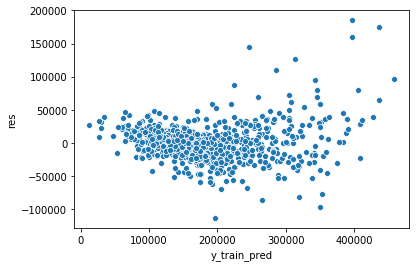

In [212]:
#Plotting Scatter plot between residual and actual

sns.scatterplot(x='y_train_pred',y='res',data = check_hetero)
plt.show()

**Looks pretty scattered across the 0 line so similar variance, thus assumption of Homoscedasticity is correct**

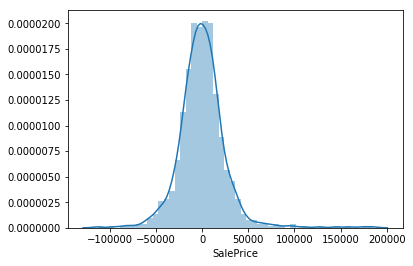

In [213]:
#Checking normality of the Residual

sns.distplot(res)

**Error terms are distributed normally**

**Now checking beta values to find most important features**

In [215]:
betas = pd.DataFrame(index=X_train1.columns)

betas.rows = X_train1.columns

betas['Ridge'] = ridgereg.coef_


betas

,Ridge
LotArea,46463.503533
OverallQual,100181.443338
OverallCond,41923.178172
YearBuilt,52312.648317
BsmtFinSF1,44476.254606
TotalBsmtSF,106745.149398
1stFlrSF,54381.634775
2ndFlrSF,50755.126453
GrLivArea,79029.208905
BedroomAbvGr,-54919.981796


## Top 10 variables for house price are
* LotArea
* OverallQual
* OverallCond
* YearBuilt
* BsmtFinSF1
* TotalBsmtSF
* 1stFlrSF
* 2ndFlrSF
* GrLivArea


# Problem Statement Part 2

**Question 1**

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

**Changing Ridge Lasso after doubling the alpha/lamda value**

In [224]:
#Doubling Alpha for Ridge

alpha = 2
ridgereg_d = Ridge(alpha=alpha)
ridgereg_d.fit(X_train1, y_train)
ridgereg_d.coef_

#Predicting test datasets

y_pred_train_rd = ridgereg_d.predict(X_train1)
y_pred_test_rd = ridgereg_d.predict(X_test1)




In [225]:

#Evaluating Ridge Regression

#Adjusted R2 Scores
r2_train_rd = r2_score(y_train,y_pred_train_rd)
 
adj_r2_rd = 1 - ((1-r2_train_rd)*(n_train-1)/(n_train-k-1))
print("Adj R2 Score for train data is using Ridge Reg:", adj_r2_rd)

r2_test_rd = r2_score(y_test,y_pred_test_rd)
adj_r2_test_rd = 1 - ((1-r2_test_rd)*(n_test-1)/(n_test-k-1))
print("Adj R2 Score for test data is using Ridge Reg:", adj_r2_test_rd)

Adj R2 Score for train data is using Ridge Reg: 0.8857904700835554
Adj R2 Score for test data is using Ridge Reg: 0.8681741109142654


In [226]:
#Calculating ssr , mse and rmse

ssr_train_rd = np.sum(np.square(y_train-y_pred_train_rd))
mse_train_rd = mean_squared_error(y_train, y_pred_train_rd)
rmse_train_rd = mse_train**0.5
print("Sum of squared error train:",ssr_train_rd)
print("Sum of Mean squared error train:",mse_train_rd)
print("Sum of Root Mean squared error train:",rmse_train_rd)

ssr_test_rd = np.sum(np.square(y_test-y_pred_test_rd))
mse_test_rd = mean_squared_error(y_test, y_pred_test_rd)
rmse_test_rd = mse_test**0.5

print("Sum of squared error test:",ssr_test_rd)
print("Sum of Mean squared error test:",mse_test_rd)
print("Sum of Root Mean squared error test:",rmse_test_rd)

Sum of squared error train: 609313227793.6643
Sum of Mean squared error train: 688489522.9306941
Sum of Root Mean squared error train: 25850.742981398016
Sum of squared error test: 225223844568.3513
Sum of Mean squared error test: 592694327.8114507
Sum of Root Mean squared error test: 25074.768421149278


In [227]:
#Most important predictor value for ridge regression

betas = pd.DataFrame(index=X_train1.columns)

betas.rows = X_train1.columns

betas['Ridge'] = ridgereg_d.coef_


betas

,Ridge
LotArea,43254.853544
OverallQual,97738.103425
OverallCond,37396.982860
YearBuilt,52247.817204
BsmtFinSF1,45656.374968
TotalBsmtSF,93303.170419
1stFlrSF,57880.067892
2ndFlrSF,46414.104322
GrLivArea,79735.915839
BedroomAbvGr,-45673.902762


In [232]:
#Doubling alpha for Lasso

alpha = 20
lassoreg_d = Lasso(alpha=alpha)
lassoreg_d.fit(X_train1, y_train)
lassoreg_d.coef_

#Predicting test datasets

y_pred_train_ld = lassoreg_d.predict(X_train1)
y_pred_test_ld = lassoreg_d.predict(X_test1)

#Adjusted R2 Scores
r2_train_ld = r2_score(y_train,y_pred_train_ld)
 
adj_r2_ld = 1 - ((1-r2_train_ld)*(n_train-1)/(n_train-k-1))
print("Adj R2 Score for train data is using Lasso Reg:", adj_r2_ld)

r2_test_ld = r2_score(y_test,y_pred_test_ld)
adj_r2_test_ld = 1 - ((1-r2_test_ld)*(n_test-1)/(n_test-k-1))
print("Adj R2 Score for test data is using Lasso Reg:", adj_r2_test_ld)

Adj R2 Score for train data is using Lasso Reg: 0.8888717786145917
Adj R2 Score for test data is using Lasso Reg: 0.8655076046027884


In [234]:
#Most important predictor value for Lasso regression

betas = pd.DataFrame(index=X_train1.columns)

betas.rows = X_train1.columns

betas['Lasso'] = lassoreg_d.coef_


betas

,Lasso
LotArea,49491.718242
OverallQual,102994.049743
OverallCond,46005.712090
YearBuilt,51711.237313
BsmtFinSF1,42520.181798
TotalBsmtSF,128085.222007
1stFlrSF,0.000000
2ndFlrSF,26923.905299
GrLivArea,127635.417662
BedroomAbvGr,-64428.667145


**Question 3**

After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

**LotArea, OverallQual, OverallCond, YearBuilt, BsmtFinSF1 are the 5 most important variables**

In [237]:
#Dropping 5 most important variables

drop_l = ['LotArea','OverallQual','OverallCond','YearBuilt','BsmtFinSF1']

In [238]:
#Create new X_train and test dataset after dropiing above columns

X_train2 = X_train1.drop(['LotArea','OverallQual','OverallCond','YearBuilt','BsmtFinSF1'],axis=1)
X_test2 = X_test1.drop(['LotArea','OverallQual','OverallCond','YearBuilt','BsmtFinSF1'],axis=1)

In [239]:
#Lasso after removing above columns

alpha = 10
lassoreg_n = Lasso(alpha=alpha)
lassoreg_n.fit(X_train2, y_train)
lassoreg_n.coef_

#Predicting test datasets

y_pred_train_ln = lassoreg_n.predict(X_train2)
y_pred_test_ln = lassoreg_n.predict(X_test2)

#Adjusted R2 Scores
r2_train_ln = r2_score(y_train,y_pred_train_ln)
 
adj_r2_ln = 1 - ((1-r2_train_ln)*(n_train-1)/(n_train-k-1))
print("Adj R2 Score for train data is using Lasso Reg:", adj_r2_ln)

r2_test_ln = r2_score(y_test,y_pred_test_ln)
adj_r2_test_ln = 1 - ((1-r2_test_ln)*(n_test-1)/(n_test-k-1))
print("Adj R2 Score for test data is using Lasso Reg:", adj_r2_test_ln)

Adj R2 Score for train data is using Lasso Reg: 0.8467140670842674
Adj R2 Score for test data is using Lasso Reg: 0.7914513741198173


In [240]:
#Most important predictor value for Lasso regression

betas1 = pd.DataFrame(index=X_train2.columns)

betas1.rows = X_train2.columns

betas1['Lasso'] = lassoreg_n.coef_


betas1

,Lasso
TotalBsmtSF,205218.316603
1stFlrSF,0.000000
2ndFlrSF,38135.200402
GrLivArea,140864.484399
BedroomAbvGr,-79436.423272
TotRmsAbvGrd,71531.075230
GarageArea,96859.236433
Street_Pave,25916.381257
Foundation_Slab,45820.920659
KitchenQual_Fa,-85659.539661
